In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # plot formatting
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn import metrics, svm
from sklearn.linear_model import LinearRegression, Perceptron,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, mean_absolute_error
from sklearn import preprocessing
import matplotlib as mpl
from sklearn.linear_model import Perceptron
mpl.rcParams['figure.dpi']= 100

In [37]:
input_df = pd.read_csv('Signal_input_data.csv', header=None)
class_labs = pd.read_csv('Signal_class_data.csv', header=None)

# df_ip.head()
# class_labs.head()

# train_test split
X_train, X_test, y_train, y_test = train_test_split(input_df, class_labs, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2)

Accuracy of perceptron classifier : 100.0000%


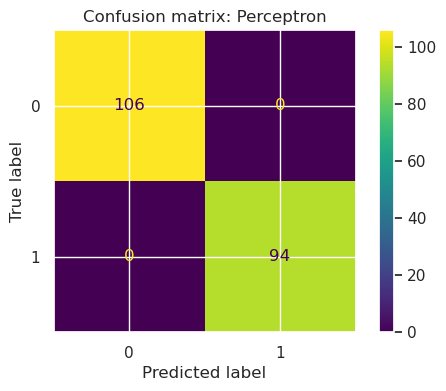

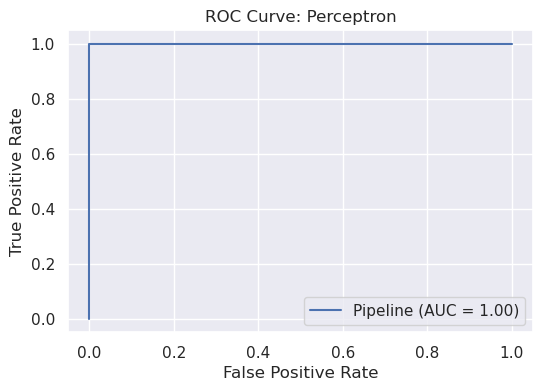

In [38]:
# Perceptron
pipe = make_pipeline(Perceptron(tol=1e-3, random_state=0))
pt_clf_model = pipe.fit(X_train, y_train.values.ravel())

cm = plot_confusion_matrix(pt_clf_model, X_test, y_test)
cm.ax_.set_title("Confusion matrix: Perceptron")
roc = metrics.plot_roc_curve(pt_clf_model, X_test, y_test)
roc.ax_.set_title("ROC Curve: Perceptron")

print("Accuracy of perceptron classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

Accuracy of Logistic regression classifier : 100.0000%


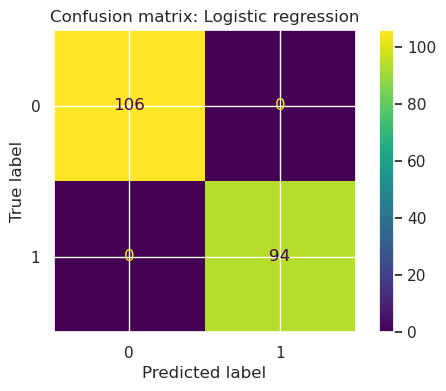

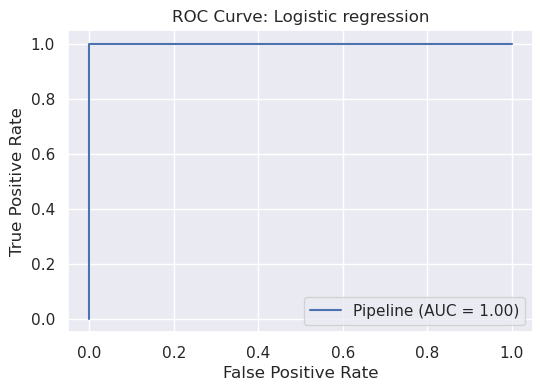

In [39]:
# Logistic Regression
pipe = make_pipeline(LogisticRegression(max_iter=1000))
lr_clf_model = pipe.fit(X_train, y_train.values.ravel())

cm = plot_confusion_matrix(lr_clf_model, X_test, y_test)
cm.ax_.set_title("Confusion matrix: Logistic regression")
roc = metrics.plot_roc_curve(lr_clf_model, X_test, y_test)
roc.ax_.set_title("ROC Curve: Logistic regression")

print("Accuracy of Logistic regression classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

Accuracy of SVM classifier : 100.0000%


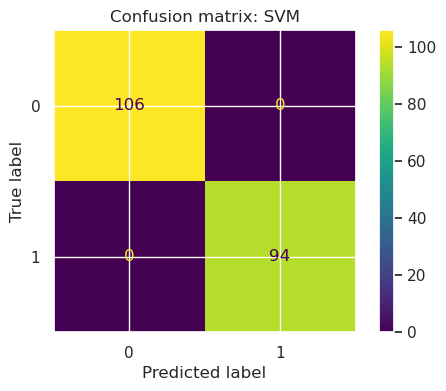

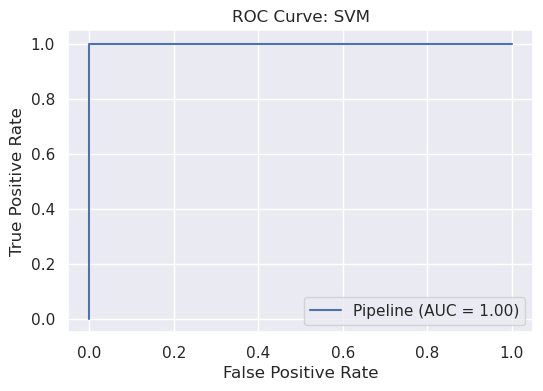

In [40]:
# SVM
from sklearn import svm
pipe = make_pipeline(svm.SVC(kernel='rbf'))
svm_clf_model = pipe.fit(X_train, y_train.values.ravel())

cm = plot_confusion_matrix(svm_clf_model, X_test, y_test)
cm.ax_.set_title("Confusion matrix: SVM")
roc = metrics.plot_roc_curve(svm_clf_model, X_test, y_test)
roc.ax_.set_title("ROC Curve: SVM")

print("Accuracy of SVM classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

Accuracy of MLP classifier : 99.5000%


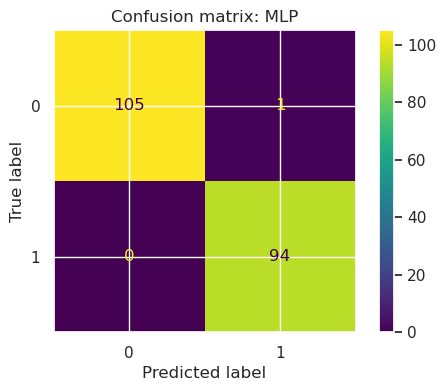

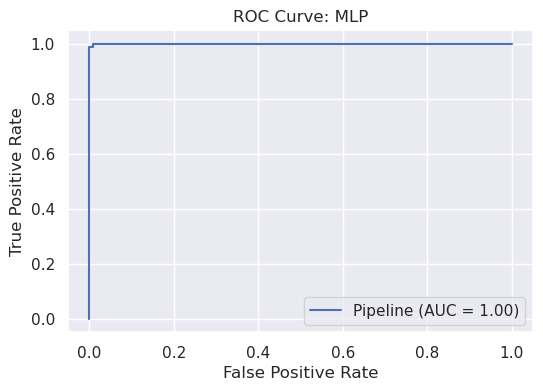

In [41]:
# MLP
pipe = make_pipeline(MLPClassifier(hidden_layer_sizes=(10,10), max_iter=300, activation='relu',random_state=123))
mlp_clf_model = pipe.fit(X_train, y_train.values.ravel())

cm = plot_confusion_matrix(mlp_clf_model, X_test, y_test)
cm.ax_.set_title("Confusion matrix: MLP")
roc = metrics.plot_roc_curve(mlp_clf_model, X_test, y_test)
roc.ax_.set_title("ROC Curve: MLP")

print("Accuracy of MLP classifier : {:.4f}%".format(pipe.score(X_test, y_test)*100))

**Which model is the best option for this dataset?** XX

## Antenna Array Design

In [7]:
ip_df = pd.read_csv('Antenna_beam_data.csv', header=None)
op_df = pd.read_csv('Array_data.csv', header=None)

ip_df = preprocessing.scale(ip_df)
op_df = preprocessing.scale(op_df)

print(ip_df.shape)
print(op_df.shape)


(10000, 100)
(10000, 102)


In [8]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(ip_df, op_df, 
                                                    train_size = 0.8, 
                                                    test_size = 0.2)

In [9]:
def train_plot(model, X_test, y_test, title):
    y_test_pred = model.predict(X_test)
    plt.plot(y_test[1])
    

In [10]:
# Linear regression
pipe = make_pipeline(LinearRegression())
lr_model = pipe.fit(X_train, y_train)
y_test_pred_lr = lr_model.predict(X_test)

# MLP
pipe_mlp = make_pipeline(MLPRegressor(hidden_layer_sizes=(100,100), activation='relu'))
mlp_model = pipe_mlp.fit(X_train, y_train)
y_test_pred_mlp = mlp_model.predict(X_test)

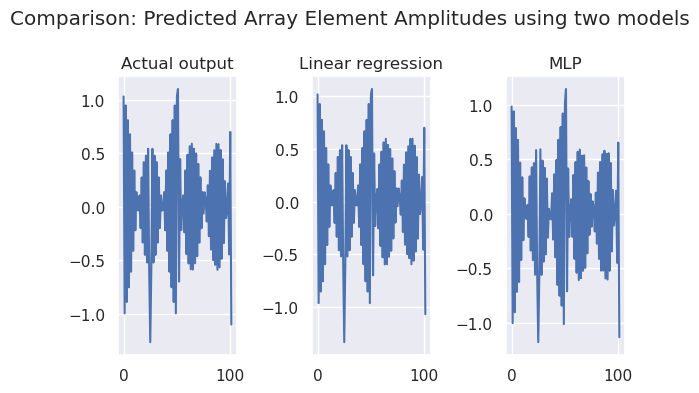

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Comparison: Predicted Array Element Amplitudes using two models')

ax1.plot(y_test[1])
ax1.set_title("Actual output")

ax2.plot(y_test_pred_lr[1])
ax2.set_title("Linear regression")

ax3.plot(y_test_pred_mlp[1])
ax3.set_title("MLP")

fig.tight_layout()

Text(0.5, 1.0, 'Linear Regression')

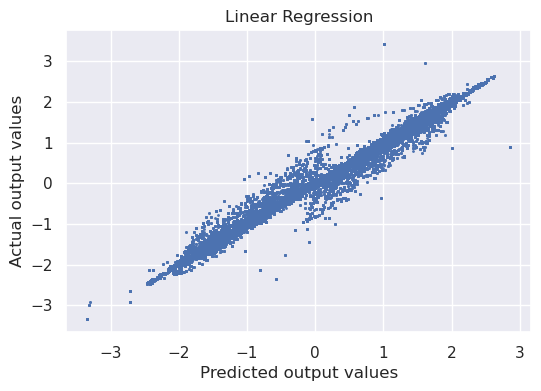

In [12]:
plt.scatter(y_test_pred_lr, y_test, s=1)
plt.xlabel("Predicted output values"), plt.ylabel("Actual output values")
plt.title("Linear Regression")

Text(0.5, 1.0, 'MLP')

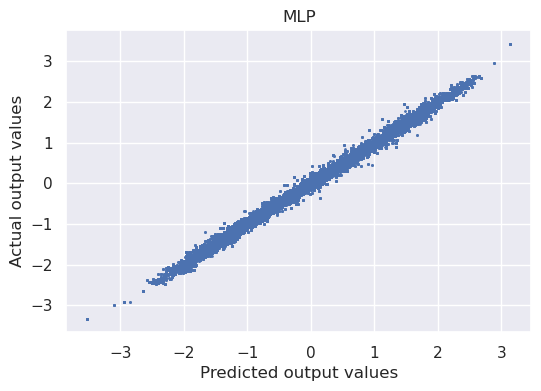

In [13]:
plt.scatter(y_test_pred_mlp, y_test, s=1)
plt.xlabel("Predicted output values"), plt.ylabel("Actual output values")
plt.title("MLP")

In [14]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))
print("RMSE: {:.3f} ".format(rmse_lr))
print("RMSE: {:.3f} ".format(rmse_mlp))

RMSE: 0.102 
RMSE: 0.044 


**Which model is the better option?**
Given the lower RMSE of the MLP based regression model, it can be concluded that **Multi-layer Perceptron Neural Network** is a better choice of model for the given dataset.